
#3. 교회 사건이 없었다면 어땠을까?

3-1.현재의 상황 예측


In [5]:
import pandas as pd
import numpy as np
import datetime
import plotly.graph_objs as go
import plotly.offline as py
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "notebook_connected"

In [6]:
#fbprophet 시계열 예측을 위한 라이브러리
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot

In [36]:
df = pd.read_csv('corona.csv', encoding='CP949')
df.columns=['date','confirmed']
df

,date,confirmed
0,2020. 1. 23.,1
1,2020. 1. 24.,1
2,2020. 1. 26.,1
3,2020. 1. 27.,1
4,2020. 1. 28.,0
...,...,...
219,2020. 8. 31.,248
220,2020. 9. 1.,235
221,2020. 9. 2.,267
222,2020. 9. 3.,195


In [37]:
#date column의 type을 datetime으로 변환
df['date'] = df['date'].str.replace('. ','-')
df['date'] = df['date'].str.replace('.','')
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', errors='raise')
df['date'] 

0     2020-01-23
1     2020-01-24
2     2020-01-26
3     2020-01-27
4     2020-01-28
         ...    
219   2020-08-31
220   2020-09-01
221   2020-09-02
222   2020-09-03
223   2020-09-04
Name: date, Length: 224, dtype: datetime64[ns]

<Figure size 14400x14400 with 0 Axes>

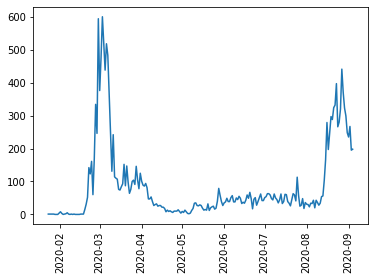

<Figure size 14400x14400 with 0 Axes>

In [38]:
# 데이터 전체(1/27-9/4) 시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.plot('date','confirmed', data=df)
plt.xticks(rotation=90)
plt.figure(figsize=(200,200))

<Figure size 14400x14400 with 0 Axes>

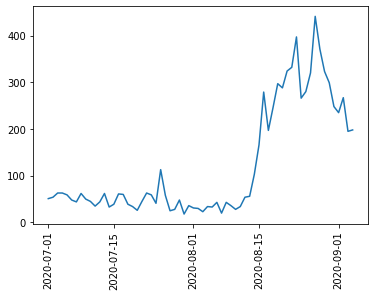

<Figure size 14400x14400 with 0 Axes>

In [39]:
# (7/1-9/4) 시각화
plt.plot(df.iloc[158:,0],df.iloc[158:,1])
plt.xticks(rotation=90)
plt.figure(figsize=(200,200))

-Facebook Prophet 적용하여 예측



In [43]:
# Facebook Prophet 예측 모델에 넣을 데이터프레임을 만들어준다.
#(날짜는 ds, 다른 변수는 y로 반드시 맞춰준다)
confirmed_prophet = df.rename(columns={'date': 'ds','confirmed': 'y'})
confirmed_prophet.tail()

,ds,y
219,2020-08-31,248
220,2020-09-01,235
221,2020-09-02,267
222,2020-09-03,195
223,2020-09-04,198


In [44]:
#Prophet 객체 생성하고 fit 해준다. 
m=Prophet() 
m.fit(confirmed_prophet)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [45]:
#예측할 미래 dataframe 생성해준다. 30일간의 미래 예측해보기
future=m.make_future_dataframe(periods=30)
future
future.tail()
#9월 4일 기준이므로 10월 4일까지의 예측이 가능

,ds
249,2020-09-30
250,2020-10-01
251,2020-10-02
252,2020-10-03
253,2020-10-04


In [46]:
forecast=m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
249,2020-09-30,192.102869,59.711937,333.164890,189.379071,195.093282,2.416698,2.416698,2.416698,2.416698,2.416698,2.416698,0.0,0.0,0.0,194.519567
250,2020-10-01,193.377350,55.676482,335.241086,190.429084,196.556565,0.543092,0.543092,0.543092,0.543092,0.543092,0.543092,0.0,0.0,0.0,193.920443
251,2020-10-02,194.651832,56.849937,325.992426,191.565637,197.992859,-0.047766,-0.047766,-0.047766,-0.047766,-0.047766,-0.047766,0.0,0.0,0.0,194.604065
252,2020-10-03,195.926313,82.472510,345.584840,192.606858,199.467284,19.838795,19.838795,19.838795,19.838795,19.838795,19.838795,0.0,0.0,0.0,215.765108
253,2020-10-04,197.200794,64.723857,338.036340,193.747892,200.953580,2.478778,2.478778,2.478778,2.478778,2.478778,2.478778,0.0,0.0,0.0,199.679572


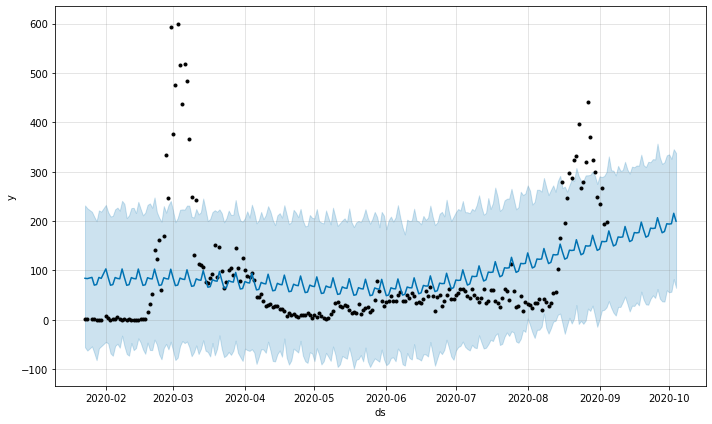

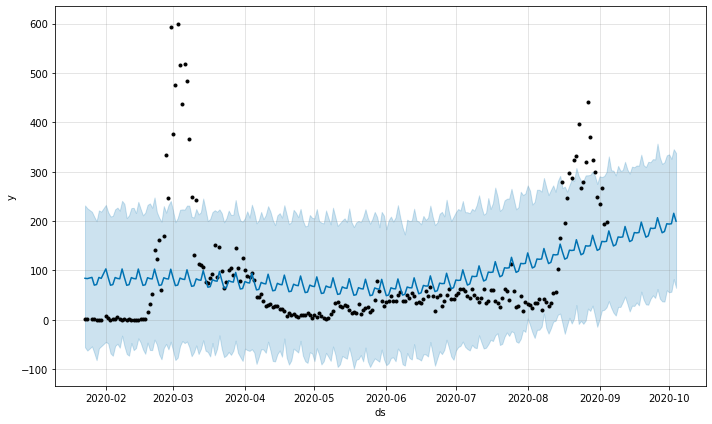

In [47]:
m.plot(forecast)

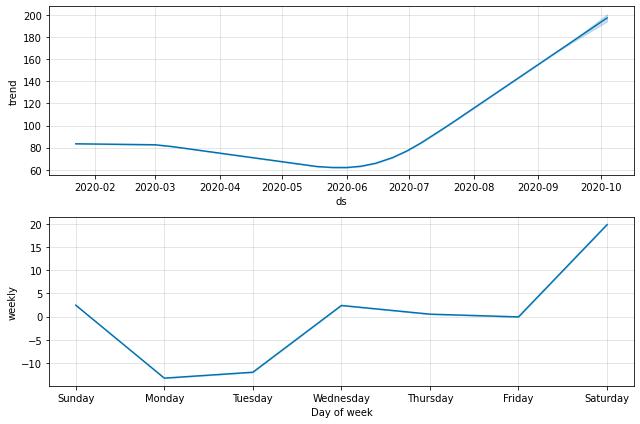

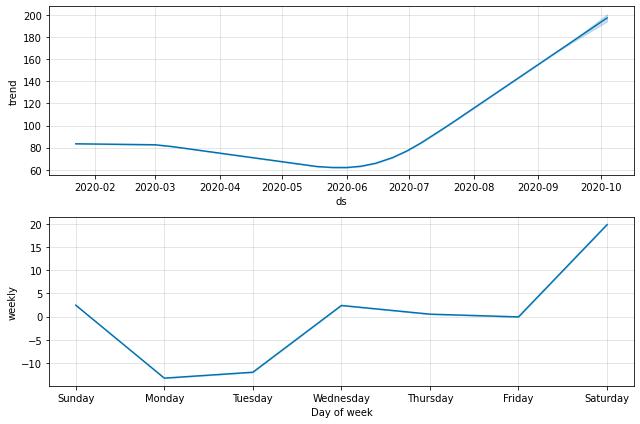

In [24]:
#forecast component를 시각화해준다(Trend, Weakly, Yearly)
m.plot_components(forecast)
#trend는 경향성을 보여주고 weekly는 한 주의 일별 경향을 보여준다.

In [48]:
#Prophet에선 기본적으로 트렌드가 변경되는 지점을 자동으로 감지해 트렌드를 예측해준다.
m = Prophet(
    changepoint_prior_scale=0.2, #Change Point의 유연성을 조정하는 방법: 디폴트는 0.05(값이 커질수록 유연해진다)
    changepoint_range=0.9, # 기본적으로 Prophet은 시계열 데이터의 80% 크기에서 잠재적으로 ChangePoint를 지정해주지만 90%로 설정해준다.
    
)

m.fit(confirmed_prophet)

#미래 dataframe
future = m.make_future_dataframe(periods=30)#현재까지의 날짜로부터 30일의 미래
forecast = m.predict(future)

fig = plot_plotly(m, forecast)
py.iplot(fig)

#점이 없이 선만 있는 부분이 예측된 미래  

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


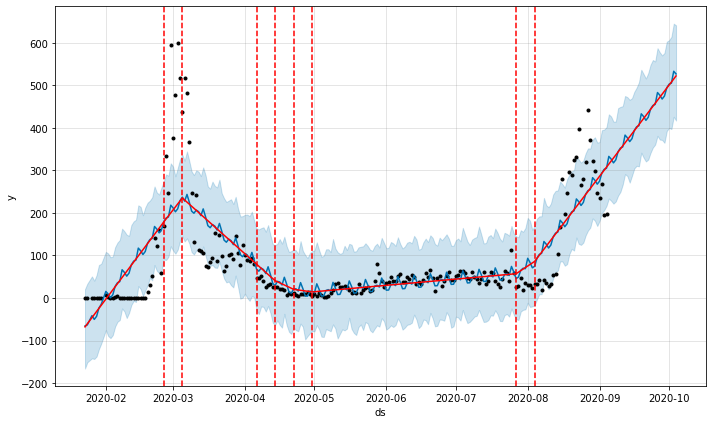

In [49]:
#checkpoints 나타내기
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)
#빨간 점선이 changepoints, 빨간 실선이 Trend를 나타낸다. 

3-2. 사랑제일교회 집단 감염이 일어나지 않았을 시 예측


In [51]:
# (7/1-8/11) 구간 설정 (8/12 최초 확진자 발생)
ifcon = df[['date','confirmed']][158:200]
ifcon.tail()

,date,confirmed
195,2020-08-07,20
196,2020-08-08,43
197,2020-08-09,36
198,2020-08-10,28
199,2020-08-11,34


<Figure size 14400x14400 with 0 Axes>

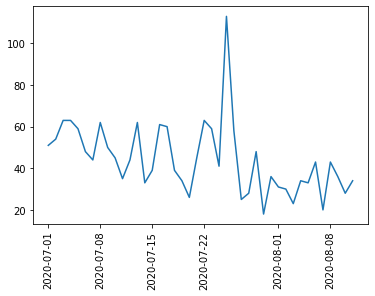

<Figure size 14400x14400 with 0 Axes>

In [52]:
#dataframe값들로 확진자 증감 시도표 그리기
plt.plot(df.iloc[158:200,0],df.iloc[158:200,1])
plt.xticks(rotation=90)
plt.figure(figsize=(200,200))

In [53]:
#fbprophet을 위한 dataframe
ifcon_prophet = ifcon.rename(columns={'date': 'ds','confirmed': 'y'})
ifcon_prophet.tail()

,ds,y
195,2020-08-07,20
196,2020-08-08,43
197,2020-08-09,36
198,2020-08-10,28
199,2020-08-11,34


In [54]:
#Prophet 객체 생성하고 fit 해준다. 
m=Prophet()
m.fit(ifcon_prophet)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [55]:
#예측할 미래 dataframe 만들기(30일)
future=m.make_future_dataframe(periods=30)
future
future.tail()

,ds
67,2020-09-06
68,2020-09-07
69,2020-09-08
70,2020-09-09
71,2020-09-10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


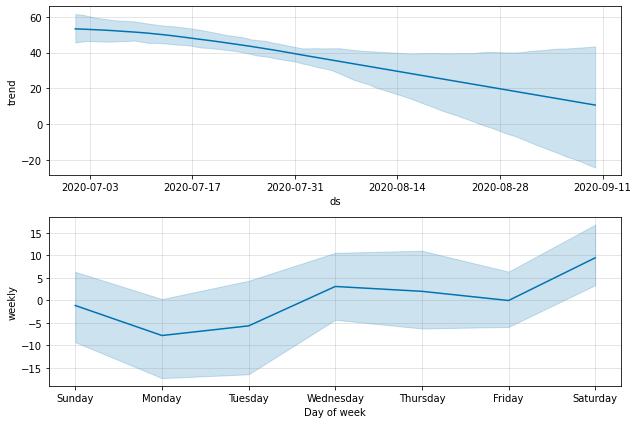

In [56]:
##교회 집단감염 전의 데이터에 불확실성을 추가해준다.
#불확실성의 범위 보기
forecast = Prophet(interval_width=0.95).fit(ifcon_prophet).predict(future)
#시즈널리티의 불확실성을 알기 위해 베이지안 샘플링을 사용해야 함,mcmc.samples 파라미터를 사용. 이 값을 사용하면 최초 n일에 대해 적용한다는 뜻
m = Prophet(mcmc_samples=28)
forecast = m.fit(ifcon_prophet).predict(future)
fig = m.plot_components(forecast)
#불투명한 구간이 불확실한 오차구간

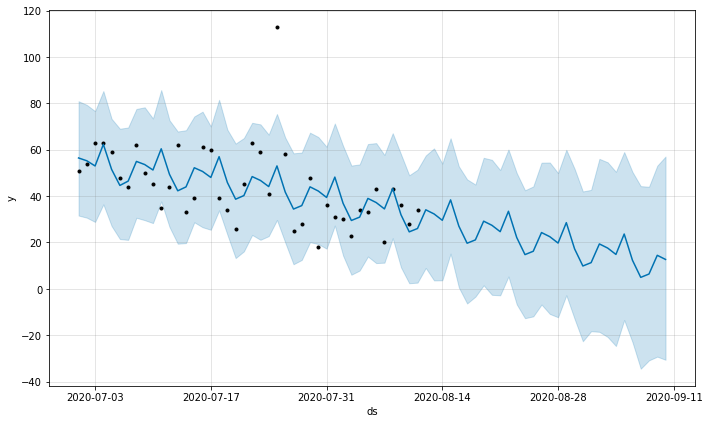

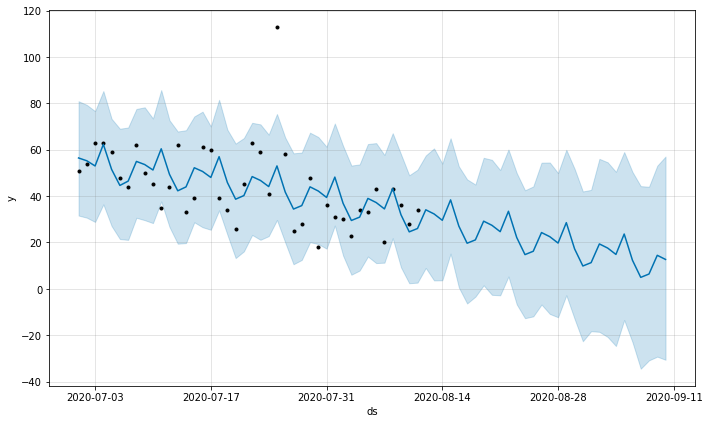

In [57]:
m.plot(forecast)

In [58]:
#예측모델 시각화
m = Prophet(
    changepoint_prior_scale=0.2, # increasing it will make the trend more flexible 디폴트는 0.05
    changepoint_range=0.9, # place potential changepoints in the first 98% of the time series
    
)

m.fit(ifcon_prophet)

future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

fig = plot_plotly(m, forecast)
py.iplot(fig)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


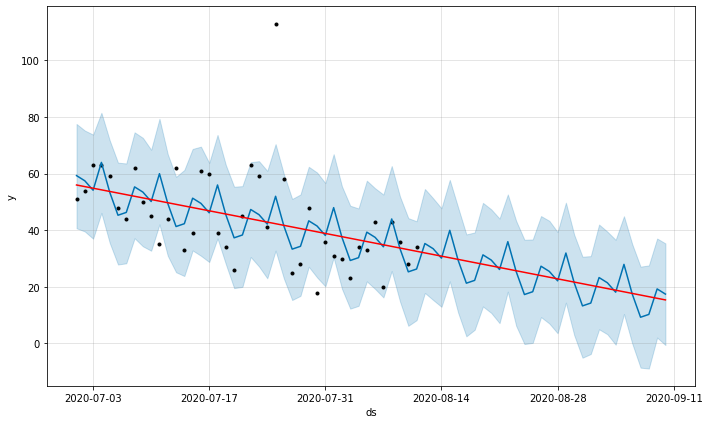

In [59]:
#checkpoints 나타내기
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)
#빨간 점선이 changepoints, 빨간 실선이 Trend를 나타낸다. 